In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
# importing ploting libraries
import matplotlib.pyplot as plt 

In [5]:
from scipy.stats import zscore

In [6]:
import seaborn as sns

In [7]:
# reading the CSV file into pandas dataframe
wine_data = pd.read_csv("wine.csv") 

In [8]:
wine_data_attr = wine_data.iloc[:,0:12]
print(wine_data_attr.shape)
wine_data_attr.head()

(177, 12)


,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05


In [9]:
features = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide', 'density','pH', 'sulphates','alcohol','quality']


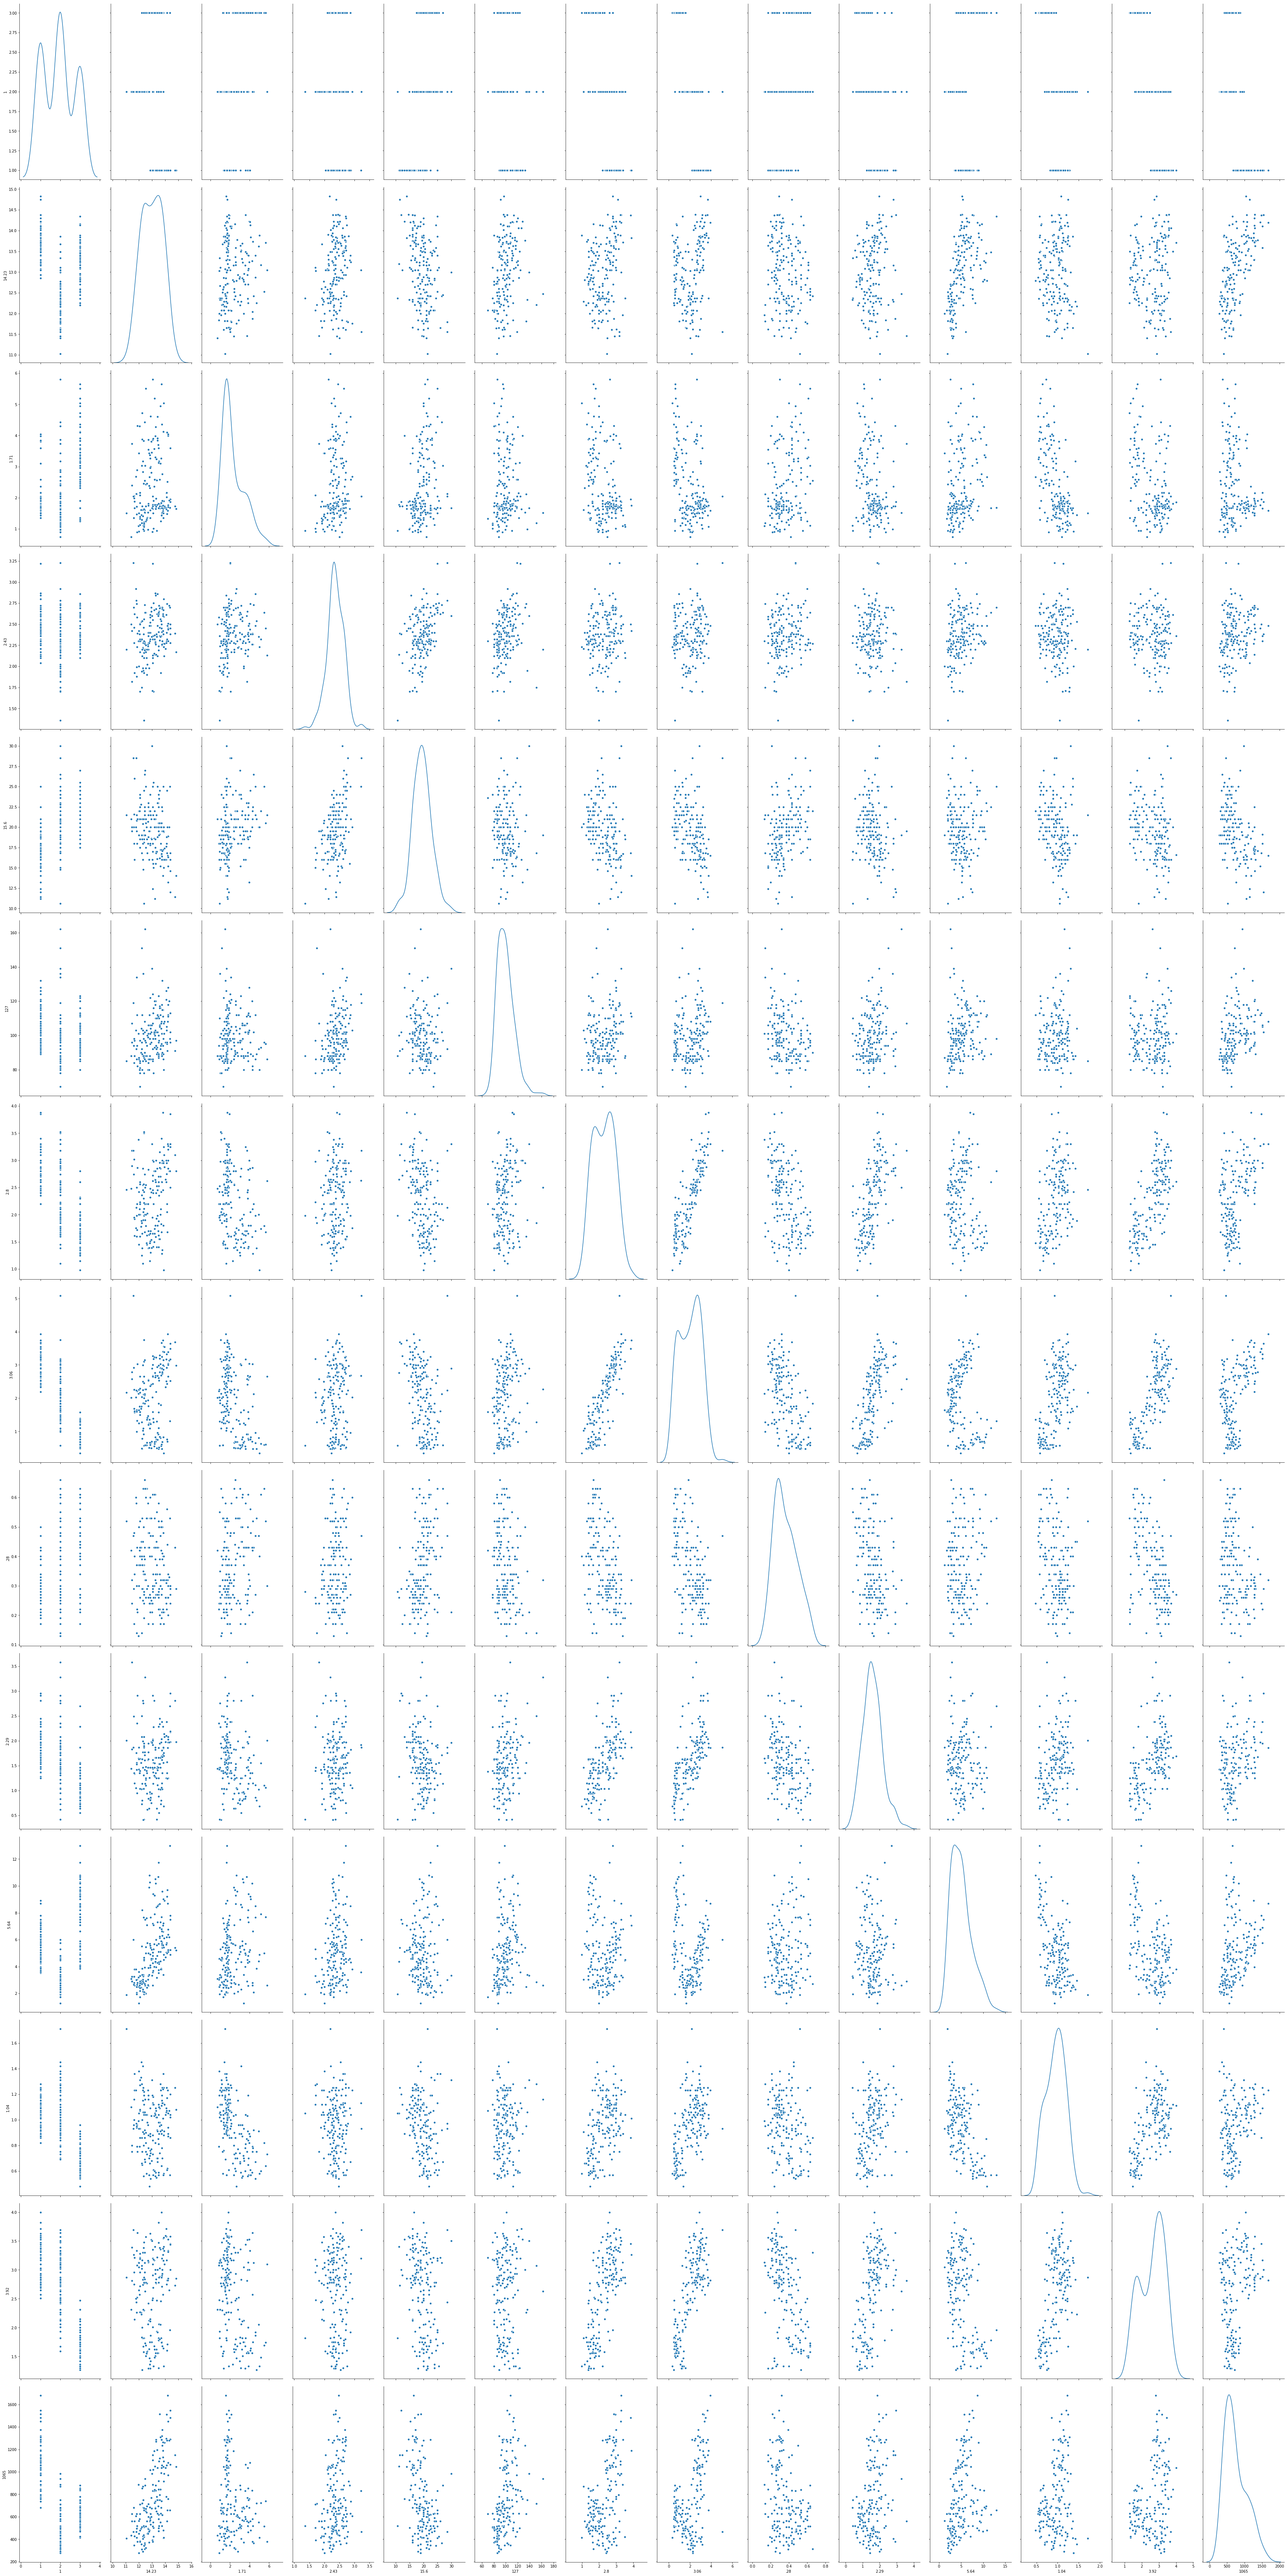

In [10]:
#importing seaborn for statistical plots
import seaborn as sns


sns.pairplot(wine_data, size=7,aspect=0.5 , diag_kind='kde')

In [15]:
from sklearn.cluster import AgglomerativeClustering 

In [16]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='average')

In [17]:
model.fit(wine_data_attr)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=6,
            pooling_func=<function mean at 0x000001EA43C6C510>)

In [18]:
wine_data_attr['labels'] = model.labels_

wine_data_attr.groupby(["labels"]).count()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04
labels,,,,,,,,,,,,
0,128,128,128,128,128,128,128,128,128,128,128,128
1,2,2,2,2,2,2,2,2,2,2,2,2
2,5,5,5,5,5,5,5,5,5,5,5,5
3,1,1,1,1,1,1,1,1,1,1,1,1
4,40,40,40,40,40,40,40,40,40,40,40,40
5,1,1,1,1,1,1,1,1,1,1,1,1


In [19]:
wine_clusters = wine_data_attr.groupby(['labels'])

In [20]:
print(wine_clusters)

In [21]:
wine_groups=wine_clusters.head(1599)#This creates a pandas dataframegroupby object

In [22]:
from pandas import ExcelWriter
writer = ExcelWriter('wine_groups_h.xls')
wine_groups.to_excel(writer, 'Sheet1')
writer.save()

In [23]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [24]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points #Not required

In [25]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(wine_data_attr, 'average')
##Try complete
#Z = linkage(wine_data_attr, 'complete')
c, coph_dists = cophenet(Z , pdist(wine_data_attr))

c

0.7904208655869432

In [26]:
#Z.shape

#Z[1]
#Z[1:10]

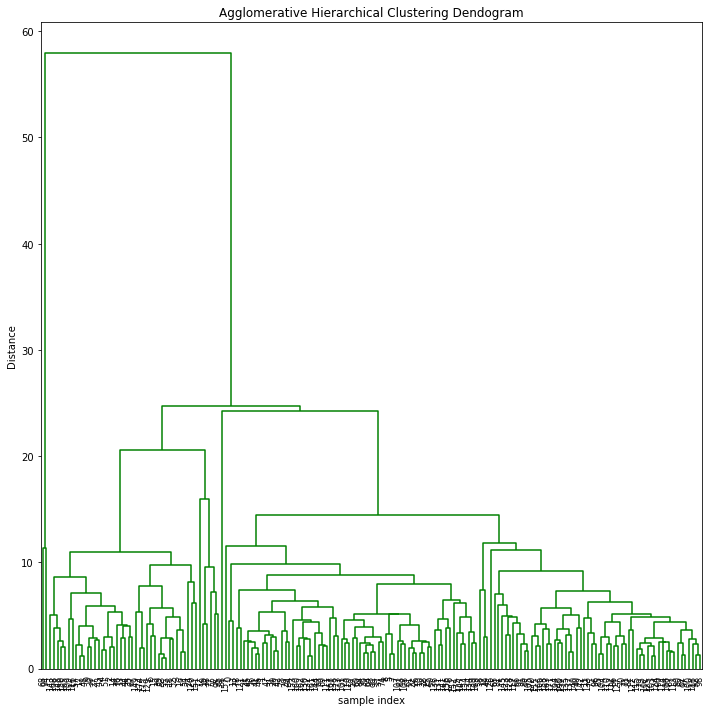

In [27]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 800, leaf_font_size=8. )
plt.tight_layout()

In [28]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(wine_data_attr, 'complete')
c, coph_dists = cophenet(Z , pdist(wine_data_attr))

c

0.6665505745054683

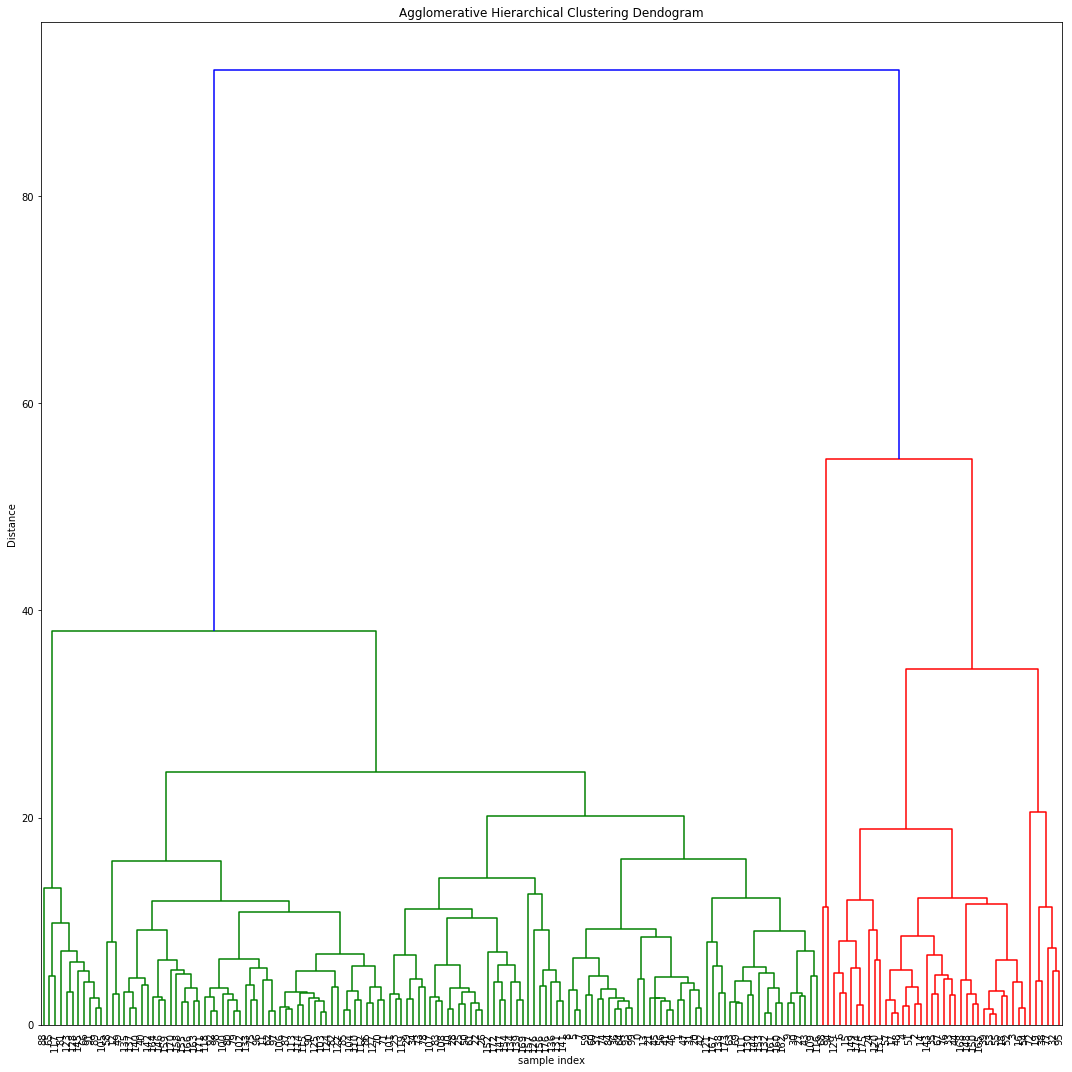

In [29]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [30]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(wine_data_attr, 'ward')
c, coph_dists = cophenet(Z , pdist(wine_data_attr))

c

0.6512587198735246

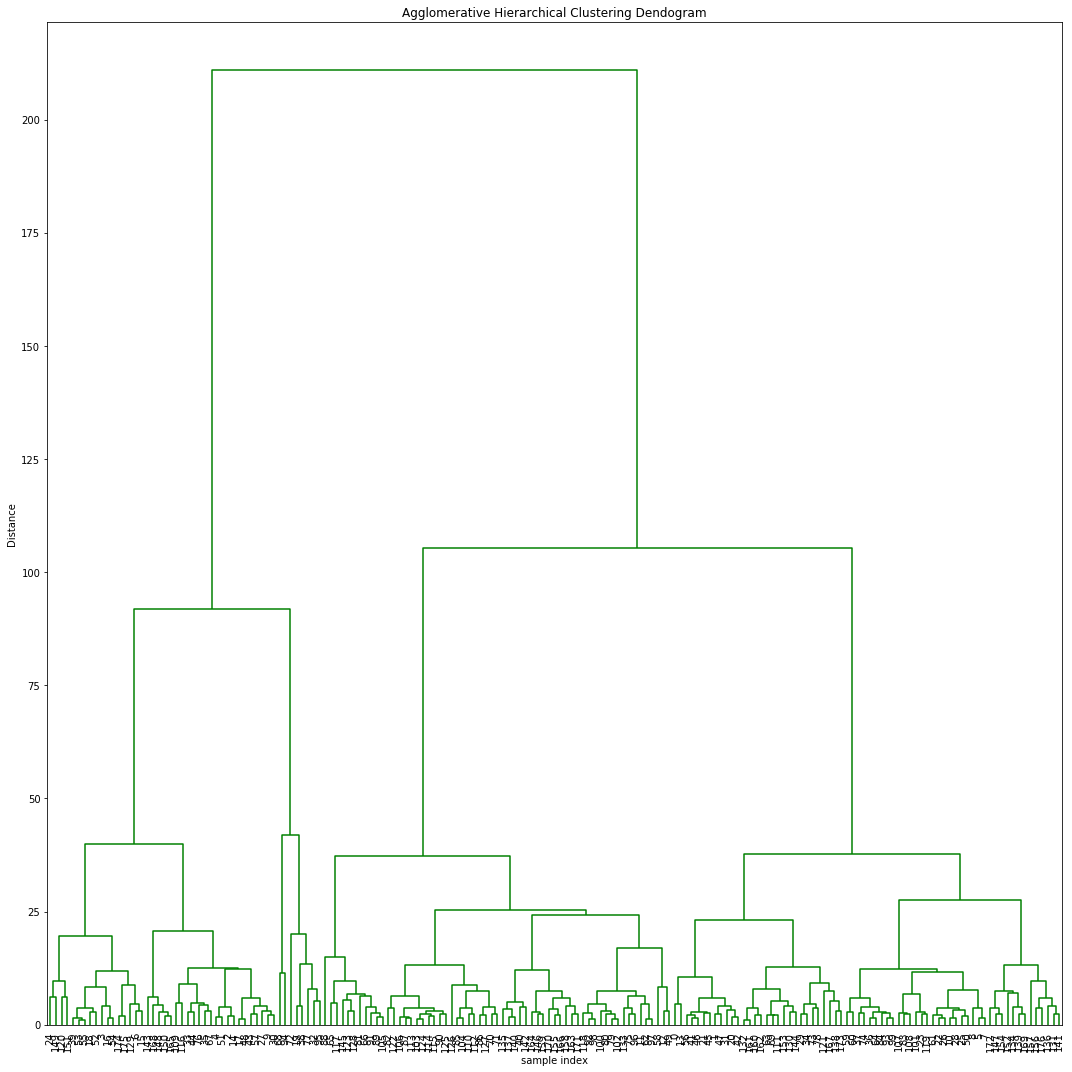

In [31]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()